<a href="https://colab.research.google.com/github/asab77/MAT-422/blob/main/Homework3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Overview  

Logistic regression is a type of \textbf{linear classifier} used for binary classification problems, predicting whether a data point belongs to one of two classes. The key mathematical concept behind logistic regression is the \textbf{sigmoid function}, defined as:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

where \(z = w \cdot X + b\) is the linear combination of the input features with weights \(w\) and bias \(b\). The output of the sigmoid function is a probability value between 0 and 1, which helps in classifying the input as:

\[
\hat{y} =
\begin{cases}
1 & \text{if } \sigma(z) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
\]

---

# Training Process  

The goal of training logistic regression is to find the optimal values of weights \(w\) and bias \(b\) that minimize the \textbf{log loss function}:

\[
\mathcal{L}(w, b) = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) \right]
\]

where \(n\) is the number of data points, \(y_i\) is the true label, and \(\hat{y_i}\) is the predicted probability for the \(i^{th}\) data point.

---

# Implementation Summary  

1. \textbf{Data Generation:}  
   We create a simple linear dataset with values between -10 and 10, labeling them as 1 if the value is positive and 0 otherwise.

2. \textbf{Training:}  
   We split the data into training and test sets and fit the logistic regression model on the training data.

3. \textbf{Evaluation:}  
   After training, we use the model to predict labels on the test set and evaluate the model with:
   - \textbf{Confusion Matrix}
   - \textbf{Classification Report (Precision, Recall, F1-score)}
   - \textbf{Accuracy Score}

4. \textbf{Visualization:}  
   The plot shows the \textbf{sigmoid curve} that acts as the decision boundary, along with the test data points. The sigmoid function maps feature values to probabilities between 0 and 1.

---

This example demonstrates how logistic regression works, showing both theoretical concepts and practical implementation using Python.


Confusion Matrix:
[[17  0]
 [ 0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


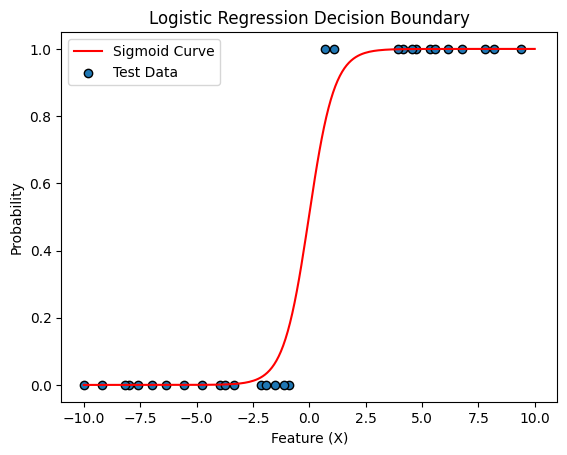

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate a sample dataset
np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)  # Feature values
y = (X > 0).astype(int).ravel()  # Binary labels (1 if X > 0, else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot the sigmoid function (decision boundary)
X_range = np.linspace(-10, 10, 200).reshape(-1, 1)
z = X_range * model.coef_[0] + model.intercept_  # Calculate z = wX + b
y_prob = sigmoid(z)

plt.plot(X_range, y_prob, label='Sigmoid Curve', color='red')
plt.scatter(X_test, y_test, label='Test Data', edgecolor='black')
plt.xlabel('Feature (X)')
plt.ylabel('Probability')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()
